# Librerias

In [57]:
# Librerias
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# Importar base de datos 

In [147]:
# Conjunto de datos de solo PM10
df= pd.read_csv("DF_PM10.csv", delimiter=";", error_bad_lines=False, header=0, decimal=",")
# Eliminar variables 
df=df.drop(['Fecha', 'Fuente', 'Año', 'Mes', 'Día', 'Hora'], axis=1)

# Tratamiento de fechas 

In [148]:
# Tratamiento de fechas y columnas extras
df["Fecha"] = pd.date_range("01-01-2015 01:00:00", periods=54952, freq="H")
df

,Bolivia,Bosa,Carvajal-Sevillana,Centro-de-Alto-Rendimiento,Ciudad-Bolivar,Colina,Fontibon,Guaymaral,Kennedy,Las-Ferias,Ministerio-de-Ambiente,Movil-Fontibon,Puente-Aranda,San-Cristobal,Suba,Tunal,Usaquen,Usme,Fecha
0,NaN,NaN,63.2,65.0,NaN,NaN,NaN,40.0,57.0,42.7,20.0,NaN,74.0,45.2,53.0,90.5,17.5,NaN,2015-01-01 01:00:00
1,NaN,NaN,96.5,61.3,NaN,NaN,NaN,51.0,82.5,55.8,34.5,NaN,NaN,91.7,66.3,119.2,23.8,NaN,2015-01-01 02:00:00
2,NaN,NaN,55.5,73.2,NaN,NaN,NaN,153.0,57.7,84.8,55.5,NaN,123.7,107.8,104.0,69.5,20.8,NaN,2015-01-01 03:00:00
3,NaN,NaN,40.2,94.0,NaN,NaN,NaN,120.0,49.0,101.8,51.7,NaN,121.2,54.8,100.0,41.2,32.0,NaN,2015-01-01 04:00:00
4,NaN,NaN,57.3,69.5,NaN,NaN,NaN,57.0,63.5,62.5,40.2,NaN,136.8,103.7,73.0,36.7,16.7,NaN,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54947,22.8,35.6,NaN,36.7,49.5,NaN,31.0,22.0,NaN,20.9,33.4,39.5,82.2,7.0,16.3,24.0,NaN,NaN,2021-04-08 12:00:00
54948,16.4,42.9,NaN,26.0,NaN,NaN,23.2,14.0,NaN,15.5,28.4,43.0,82.7,3.0,12.9,12.0,NaN,NaN,2021-04-08 13:00:00
54949,28.6,37.5,NaN,18.4,NaN,NaN,24.0,10.0,NaN,13.2,20.1,63.5,70.5,7.0,9.0,17.0,NaN,NaN,2021-04-08 14:00:00
54950,21.8,32.0,NaN,13.2,20.4,12.5,13.2,7.0,NaN,20.0,16.6,48.4,46.6,5.0,24.4,10.0,NaN,NaN,2021-04-08 15:00:00


In [149]:
# Ponerla como índice
df.index=pd.to_datetime(df["Fecha"])
df=df.drop("Fecha", axis=1)
df.head(5)

,Bolivia,Bosa,Carvajal-Sevillana,Centro-de-Alto-Rendimiento,Ciudad-Bolivar,Colina,Fontibon,Guaymaral,Kennedy,Las-Ferias,Ministerio-de-Ambiente,Movil-Fontibon,Puente-Aranda,San-Cristobal,Suba,Tunal,Usaquen,Usme
Fecha,,,,,,,,,,,,,,,,,,
2015-01-01 01:00:00,NaN,NaN,63.2,65.0,NaN,NaN,NaN,40.0,57.0,42.7,20.0,NaN,74.0,45.2,53.0,90.5,17.5,NaN
2015-01-01 02:00:00,NaN,NaN,96.5,61.3,NaN,NaN,NaN,51.0,82.5,55.8,34.5,NaN,NaN,91.7,66.3,119.2,23.8,NaN
2015-01-01 03:00:00,NaN,NaN,55.5,73.2,NaN,NaN,NaN,153.0,57.7,84.8,55.5,NaN,123.7,107.8,104.0,69.5,20.8,NaN
2015-01-01 04:00:00,NaN,NaN,40.2,94.0,NaN,NaN,NaN,120.0,49.0,101.8,51.7,NaN,121.2,54.8,100.0,41.2,32.0,NaN
2015-01-01 05:00:00,NaN,NaN,57.3,69.5,NaN,NaN,NaN,57.0,63.5,62.5,40.2,NaN,136.8,103.7,73.0,36.7,16.7,NaN


# Tratar missing values

In [150]:
# NaN :
df.isnull().sum()

Bolivia                       50952
Bosa                          51280
Carvajal-Sevillana             5258
Centro-de-Alto-Rendimiento     4699
Ciudad-Bolivar                50904
Colina                        53590
Fontibon                      35177
Guaymaral                      3115
Kennedy                        2459
Las-Ferias                     4532
Ministerio-de-Ambiente         5105
Movil-Fontibon                54617
Puente-Aranda                  2331
San-Cristobal                  3370
Suba                           5187
Tunal                          2217
Usaquen                        9163
Usme                          50560
dtype: int64

In [151]:
# tratar datos faltantes con pandas
df = df.interpolate(method ='cubic', limit_direction ='both')
df.isnull().sum()

Bolivia                       50760
Bosa                          50400
Carvajal-Sevillana              872
Centro-de-Alto-Rendimiento        0
Ciudad-Bolivar                50760
Colina                        52944
Fontibon                      34463
Guaymaral                         0
Kennedy                          10
Las-Ferias                        0
Ministerio-de-Ambiente            0
Movil-Fontibon                54615
Puente-Aranda                     0
San-Cristobal                     0
Suba                              0
Tunal                             0
Usaquen                         928
Usme                          50508
dtype: int64

In [152]:
# Borrar datos faltantes de las estaciones "malas" el nombre de Bosa tiene un espacio al final
df=df.drop(['Bolivia','Bosa ', 'Ciudad-Bolivar', 'Colina', 'Fontibon', 'Movil-Fontibon', 'Usme'], axis=1)

In [153]:
# Cuantos NaN quedas
df.isnull().sum()

Carvajal-Sevillana            872
Centro-de-Alto-Rendimiento      0
Guaymaral                       0
Kennedy                        10
Las-Ferias                      0
Ministerio-de-Ambiente          0
Puente-Aranda                   0
San-Cristobal                   0
Suba                            0
Tunal                           0
Usaquen                       928
dtype: int64

In [154]:
# Se elimnan muchas menos observaciones que en un prinicipio 
df = df.dropna()

In [155]:
# Con lo que la base que se tiene
df.head(5)

,Carvajal-Sevillana,Centro-de-Alto-Rendimiento,Guaymaral,Kennedy,Las-Ferias,Ministerio-de-Ambiente,Puente-Aranda,San-Cristobal,Suba,Tunal,Usaquen
Fecha,,,,,,,,,,,
2015-01-01 01:00:00,63.2,65.0,40.0,57.0,42.7,20.0,74.00000,45.2,53.0,90.5,17.5
2015-01-01 02:00:00,96.5,61.3,51.0,82.5,55.8,34.5,125.14674,91.7,66.3,119.2,23.8
2015-01-01 03:00:00,55.5,73.2,153.0,57.7,84.8,55.5,123.70000,107.8,104.0,69.5,20.8
2015-01-01 04:00:00,40.2,94.0,120.0,49.0,101.8,51.7,121.20000,54.8,100.0,41.2,32.0
2015-01-01 05:00:00,57.3,69.5,57.0,63.5,62.5,40.2,136.80000,103.7,73.0,36.7,16.7


In [156]:
# No missing values
df.isnull().sum()

Carvajal-Sevillana            0
Centro-de-Alto-Rendimiento    0
Guaymaral                     0
Kennedy                       0
Las-Ferias                    0
Ministerio-de-Ambiente        0
Puente-Aranda                 0
San-Cristobal                 0
Suba                          0
Tunal                         0
Usaquen                       0
dtype: int64

# Quitar datos átipicos que salen del pandas interpolate

In [157]:
# Se crean z scores y elimnar las observaciones con z mayores a 3 
# Es necesario eliminar la fecha para que la función sirva
from scipy import stats
z = np.abs(stats.zscore(df))
df_o = df[(z < 3).all(axis=1)]

In [158]:
df.shape

(54024, 11)

In [159]:
df_o.shape

(45389, 11)

In [160]:
# Ahora se tiene la base de datos completa y sin Outliers
df = df_o

# Gráfico

In [161]:
# Que estaciones tenemos?
df.columns

Index(['Carvajal-Sevillana', 'Centro-de-Alto-Rendimiento', 'Guaymaral',
       'Kennedy', 'Las-Ferias', 'Ministerio-de-Ambiente', 'Puente-Aranda',
       'San-Cristobal', 'Suba', 'Tunal', 'Usaquen'],
      dtype='object')

array([<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>,
       <AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>,
       <AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>,
       <AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>,
       <AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>,
       <AxesSubplot:xlabel='Fecha'>], dtype=object)

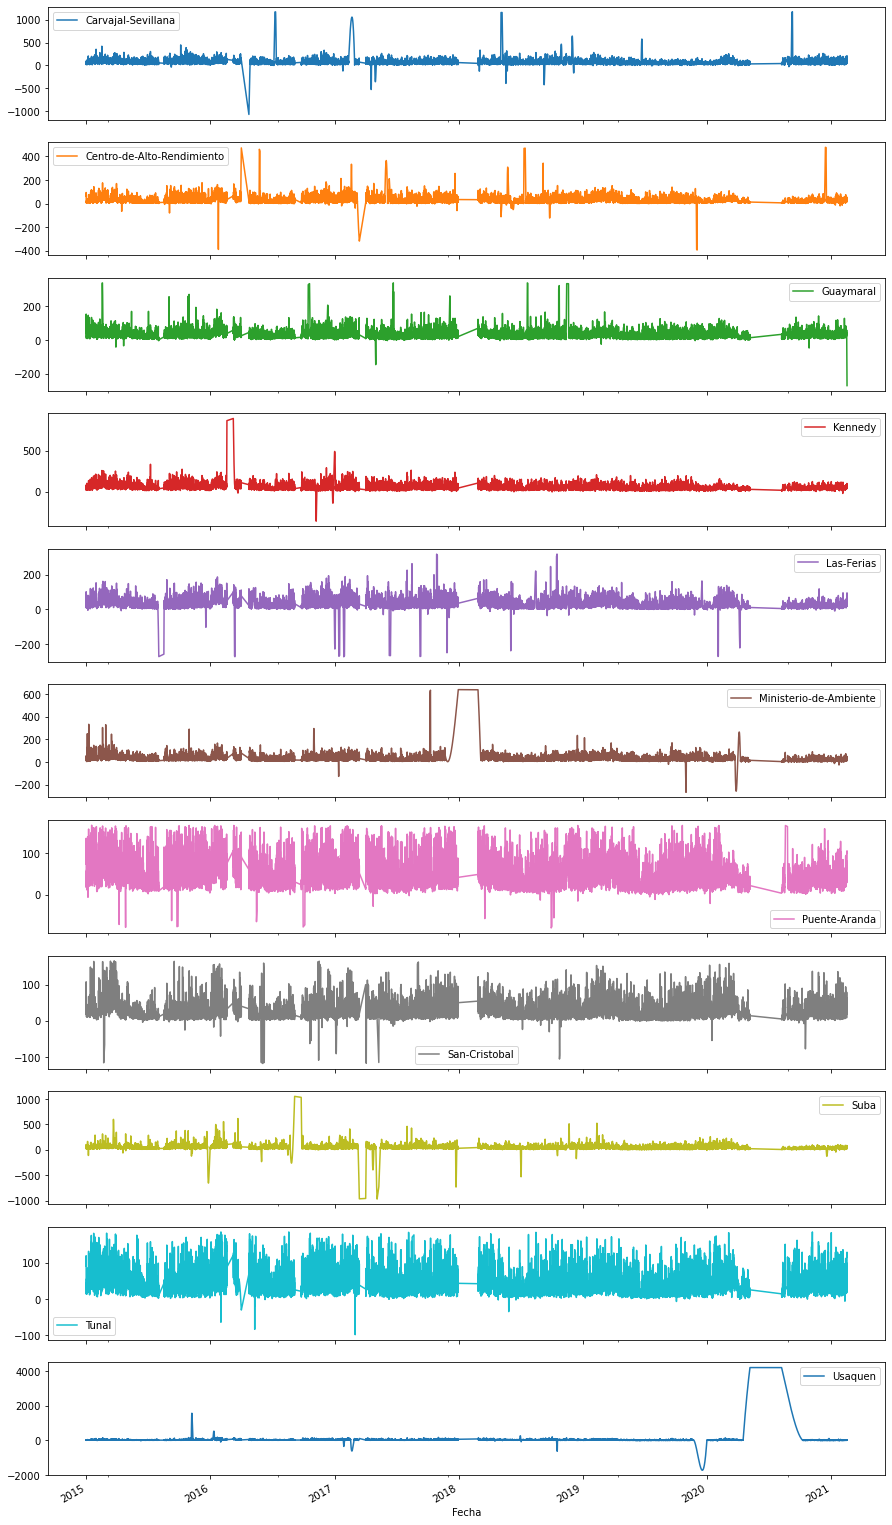

In [178]:
# Gráfico MEJORAR
df.plot(subplots=True, figsize=(15,30))

# Funciones para gráficos 

In [179]:
def create_time_steps(length):
  return list(range(-length, 0))

In [180]:
def show_plot(plot_data, delta, title):
  labels = ['Historia', 'Futuro Verdadero' , 'Predicción del Modelo']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Salto de tiempo (Time-Step)')
  return plt

In [181]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Pérdida entrenamiento')
    plt.plot(epochs, val_loss, 'r', label='Pérdida validación')
    plt.title(title)
    plt.legend()

    plt.show()

In [182]:
def plot_serie_prediction(y_test, y_pred,rms, epochs):
    plt.plot(np.arange(0, len(y_test)), y_test, marker='.', label="verdadero")
    plt.plot(np.arange(0, len(y_test)), y_pred, marker='+', label="predicho")
    plt.xlabel('Time Step')
    plt.annotate("rms = "+str(round(rms,2)) , xy=(100, 140), size = 15)
    #plt.annotate("modelo = LSTM(50), timestep=60" , xy=(100, 146), size = 15)
    #plt.annotate("epochs=40" , xy=(100, 143), size = 15)
    plt.title("Intervalo de predicción a un día. Escala original", size = 20)
    plt.legend()
    plt.show()

# Funciones para preparar los datos de entrenamiento 

In [184]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    ''' dataset: conjunto de datos para las secuencias de entrada
        target:  conjunto de datos para las secuencias de salida
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la venytana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
        step: Cada cuántas observaciones deben tomarse. Para secuencias muy largas
              que no cambia mucho localmente
        single_step: Predecir solamente un valor futuro (=True),
                     o predecir todos los valores hasta target_size(=False)
    '''  
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

# División de datos 

In [185]:
TRAIN_SPLIT  = int(len(df)*80/100) # 80%
TRAIN_SPLIT

36311

# Se debe garantizar reproducibilidad

In [187]:
tf.random.set_seed(13)

# Pronóstico de una serie de tiempo multivariada

In [188]:
# Estaciones que se tienen
df.columns

Index(['Carvajal-Sevillana', 'Centro-de-Alto-Rendimiento', 'Guaymaral',
       'Kennedy', 'Las-Ferias', 'Ministerio-de-Ambiente', 'Puente-Aranda',
       'San-Cristobal', 'Suba', 'Tunal', 'Usaquen'],
      dtype='object')

In [189]:
features_considered = ['Carvajal-Sevillana', 'Centro-de-Alto-Rendimiento', 'Guaymaral',
       'Kennedy', 'Las-Ferias', 'Ministerio-de-Ambiente', 'Puente-Aranda',
       'San-Cristobal', 'Suba', 'Tunal', 'Usaquen']


In [191]:
features = df[features_considered]
features

,Carvajal-Sevillana,Centro-de-Alto-Rendimiento,Guaymaral,Kennedy,Las-Ferias,Ministerio-de-Ambiente,Puente-Aranda,San-Cristobal,Suba,Tunal,Usaquen
Fecha,,,,,,,,,,,
2015-01-01 01:00:00,63.2,65.0,40.000000,57.0,42.7,20.000000,74.00000,45.2,53.0,90.5,17.5
2015-01-01 02:00:00,96.5,61.3,51.000000,82.5,55.8,34.500000,125.14674,91.7,66.3,119.2,23.8
2015-01-01 03:00:00,55.5,73.2,153.000000,57.7,84.8,55.500000,123.70000,107.8,104.0,69.5,20.8
2015-01-01 04:00:00,40.2,94.0,120.000000,49.0,101.8,51.700000,121.20000,54.8,100.0,41.2,32.0
2015-01-01 05:00:00,57.3,69.5,57.000000,63.5,62.5,40.200000,136.80000,103.7,73.0,36.7,16.7
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-16 05:00:00,89.0,33.3,-220.383231,75.0,39.9,28.600000,42.50000,25.0,53.0,49.0,33.0
2021-02-16 06:00:00,145.0,37.9,-233.141493,57.7,34.0,21.300000,69.00000,30.0,77.8,92.0,17.3
2021-02-16 07:00:00,148.0,38.6,-245.809276,64.4,95.4,25.564977,70.20000,30.0,80.4,103.0,31.0


In [192]:
# Ya se tiene el index de fecha proveniente de la parte anterior>

In [193]:
# Replica de gráficos de Montenegro

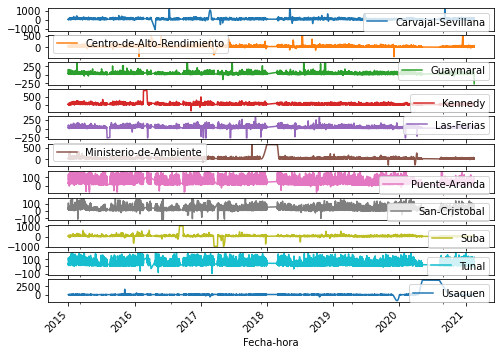

In [194]:
features.plot(subplots=True, rot=45, xlabel='Fecha-hora')
plt.show()

In [195]:
# Se estandariza
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [196]:
dataset = (dataset-data_mean)/data_std


# Modelo de un paso

# Crea arreglos de datos de entrenamiento y validación


In [197]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [198]:
print(dataset.shape)
print(x_train_single.shape)
print(y_train_single.shape)
print(x_val_single.shape)
print(y_val_single.shape)

(45389, 11)
(35591, 120, 11)
(35591,)
(8286, 120, 11)
(8286,)


In [199]:
print ('Ventana ejemplo de la historia pasada : {}'.format(x_train_single[0].shape))


Ventana ejemplo de la historia pasada : (120, 11)


In [200]:
x_train_single[0:10,:]

array([[[-0.15893609,  0.87548311,  0.38525279, ...,  0.11094074,
          1.79941052, -0.22701982],
        [-0.44326074,  0.63863264,  1.18353738, ...,  0.14265924,
         -0.14415643, -0.2664874 ],
        [-0.15016064, -0.54561973, -0.75515377, ..., -0.24853565,
         -0.0797288 , -0.30595498],
        ...,
        [-0.07293666, -0.52015194,  0.27121214, ...,  0.07076397,
         -0.09046674, -0.18360549],
        [ 0.00804458, -0.55580685, -0.52707246, ...,  0.12468542,
          0.56454754, -0.2664874 ],
        [ 0.19825314, -0.53288584, -0.56508601, ..., -0.12166163,
         -0.35891521, -0.26254064]],

       [[ 0.13328646,  0.78125228,  0.80340186, ...,  0.25155944,
          2.82667334, -0.14413791],
        [-0.29671069,  0.29736421,  0.49929345, ...,  0.07922223,
         -0.1083633 , -0.07178069],
        [-0.38885294, -0.5252455 , -0.71714022, ..., -0.19567147,
         -0.58083262, -0.31516408],
        ...,
        [-0.07293666, -0.49468415, -0.56508601, ...,  

# Crea objetos tf.data.Dataset para entreno y validación


In [201]:
# Manejo más eficiente de la memoria
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

# Modelo LSTM


In [205]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

print('version de tf: ', tf.__version__)

from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

version de tf:  2.4.1


In [206]:
input_shape = (x_train_single.shape[1], x_train_single.shape[2])
units = 32
drop_out_rate = 0.0

# layers
inputs = Input(input_shape)
x = Dropout(drop_out_rate, name= 'Dropout_01')(inputs)
x = LSTM(units=units, name='LSTM_layer',
         dropout=drop_out_rate, recurrent_dropout=drop_out_rate)(x)
x = Dropout(drop_out_rate, name= 'Dropout_02')(x)
outputs = Dense(1)(x)

# model
single_step_model = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
single_step_model.summary()

#single_step_model = tf.keras.models.Sequential()
#single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
#single_step_model.add(tf.keras.layers.Dense(1))

Model: "series_LSTM_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 11)]         0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 120, 11)           0         
_________________________________________________________________
LSTM_layer (LSTM)            (None, 32)                5632      
_________________________________________________________________
Dropout_02 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,665
Trainable params: 5,665
Non-trainable params: 0
_________________________________________________________________


# Compila 

In [207]:
single_step_model.compile(optimizer=Adam(), loss='mae')


In [208]:
# Predicción Simple
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(256, 1)


In [209]:
single_step_model.predict(x).T


array([[-9.5374398e-02, -6.5382704e-02, -1.4264069e-01, -2.4829476e-01,
        -1.5990895e-01, -6.2058166e-02, -3.4740813e-02, -9.2201523e-02,
        -1.3775076e-01, -1.8908235e-01, -6.6212133e-02, -2.2637624e-02,
        -2.9641941e-02, -6.9790214e-02, -1.7502050e-01, -2.5773871e-01,
        -1.5645209e-01, -1.3690382e-01, -1.0182492e-02, -1.1170538e-02,
        -1.0412832e-01, -1.4481238e-01, -1.0696016e-01, -8.1023455e-02,
         5.9328973e-05, -5.1468782e-02, -1.0866177e-01, -1.0061621e-01,
        -2.3514792e-02, -6.4372271e-04,  9.2859499e-02,  1.0002557e-02,
        -1.1843555e-02,  5.1099658e-03,  2.0227879e-02,  2.8381392e-02,
         1.1374248e-01,  5.0810684e-02, -1.9583696e-02, -5.0170477e-02,
        -6.1279345e-02, -1.5173779e-01,  3.1231023e-02, -2.8646745e-02,
        -1.1511628e-02, -8.7246951e-03, -1.3669945e-02, -8.0273814e-02,
         5.4625139e-02, -2.8976582e-02, -2.7068868e-02, -4.3451652e-02,
         2.5364440e-02, -6.2513426e-03,  8.4272809e-02,  3.90860

# Entrena

In [210]:
EVALUATION_INTERVAL = 200
EPOCHS = 10
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/10
200/200 [==============================] - 17s 74ms/step - loss: 0.5155 - val_loss: 0.4152
Epoch 2/10
200/200 [==============================] - 15s 77ms/step - loss: 0.4828 - val_loss: 0.3930
Epoch 3/10
200/200 [==============================] - 15s 77ms/step - loss: 0.4495 - val_loss: 0.4178
Epoch 4/10
200/200 [==============================] - 16s 78ms/step - loss: 0.4656 - val_loss: 0.4274
Epoch 5/10
200/200 [==============================] - 15s 75ms/step - loss: 0.4245 - val_loss: 0.4209
Epoch 6/10
200/200 [==============================] - 15s 75ms/step - loss: 0.4548 - val_loss: 0.4733
Epoch 7/10
200/200 [==============================] - 15s 75ms/step - loss: 0.4025 - val_loss: 0.4868
Epoch 8/10
200/200 [==============================] - 15s 76ms/step - loss: 0.3977 - val_loss: 0.5045
Epoch 9/10
200/200 [==============================] - 15s 74ms/step - loss: 0.3906 - val_loss: 0.6730
Epoch 10/10
200/200 [==============================] - 15s 75ms/step - loss: 0.383

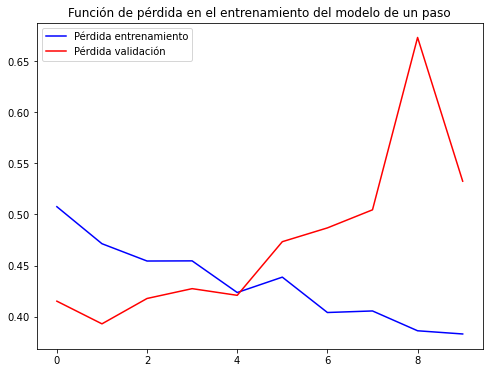

In [211]:
plot_train_history(single_step_history,
                   'Función de pérdida en el entrenamiento del modelo de un paso')

# Predicciones

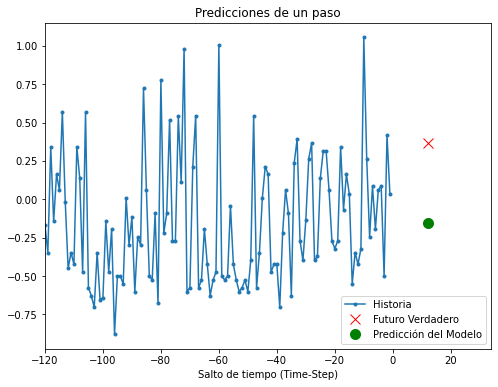

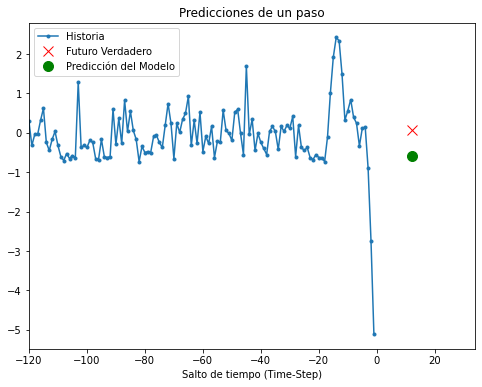

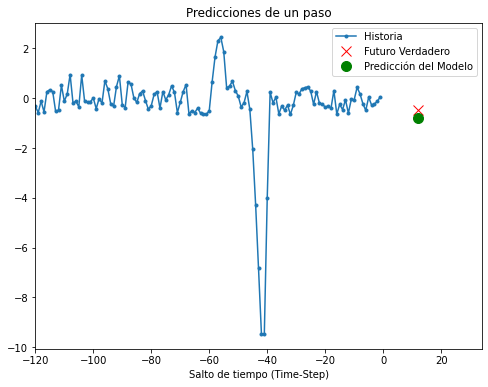

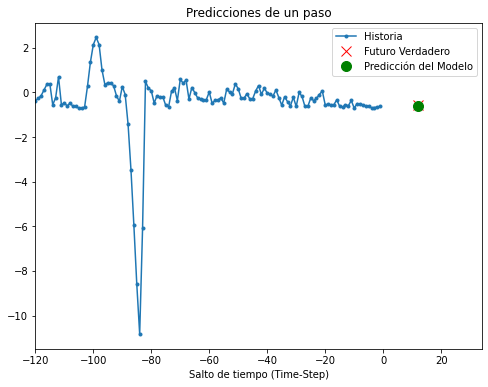

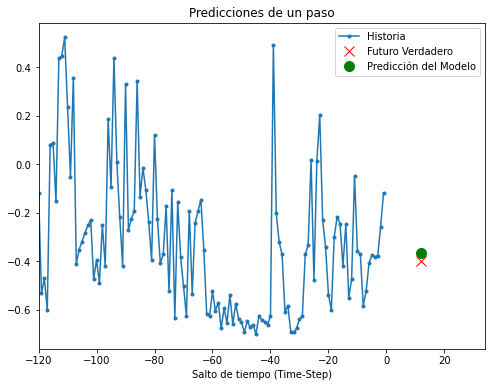

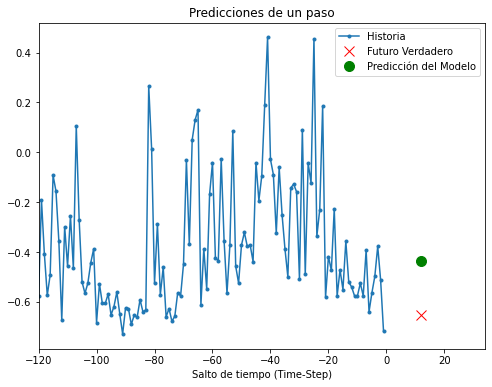

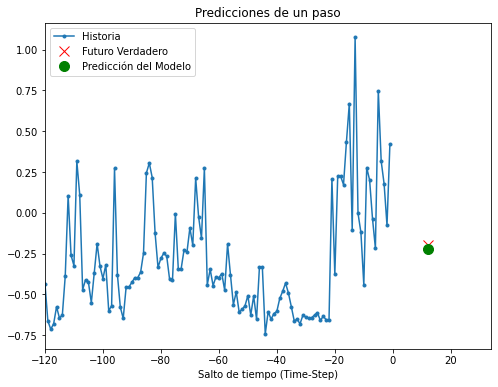

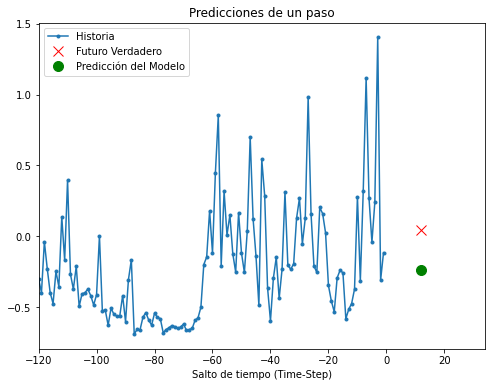

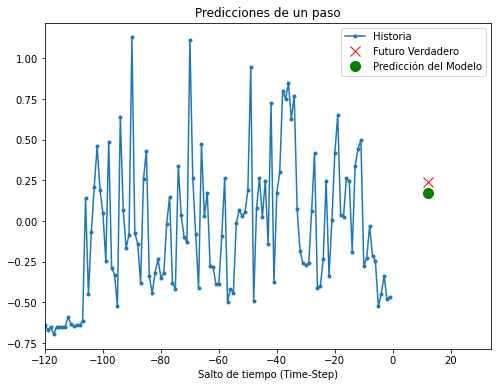

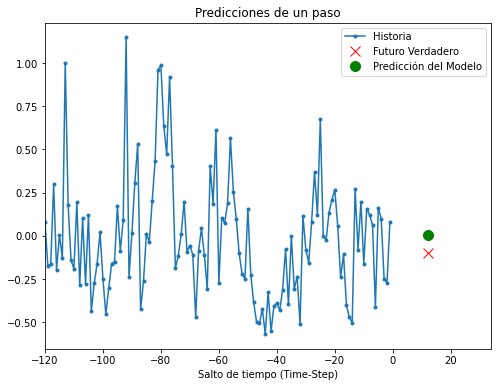

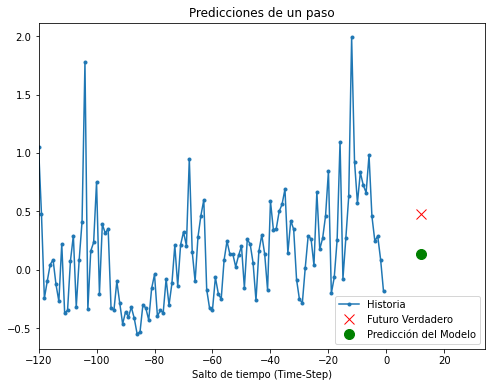

In [213]:

for x, y in val_data_single.take(11):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Predicciones de un paso')
    plot.show()

In [217]:
# y_pred =[]

# for x, y in val_data_single:
    #pred = single_step_model.predict(x)
    
    #plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
      #              single_step_model.predict(x)[0]], 12,
       #            'Predicciones de un paso')
    #plot.show()
    #Muy largo muchs gráficos

In [220]:
y_pred = single_step_model.predict(x_val_single)
y_pred = np.squeeze(y_pred,axis=1)
y_test = y_val_single

In [221]:
print(y_pred.shape)
print(y_test.shape)

(8286,)
(8286,)


# RMS

In [222]:

rmsLSTM = np.sqrt(np.mean(np.power(y_pred-y_test,2)))
print(rmsLSTM )

1.140804008729731


In [223]:
def plot_series(y_test,y_pred, title, x_label, y_label,rms,epochs):
    plt.plot(np.arange(0, len(y_test)), y_test, marker='.', label="verdadero")
    plt.plot(np.arange(0, len(y_test)), y_pred, marker='+', label="predicho")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate("rms="+str(round(rms,2)) , xy=(500, 1.3), size = 10)
    #plt.annotate("modelo = LSTM(50), timestep=60" , xy=(100, 146), size = 15)
    #
    plt.annotate("epochs="+str(epochs) , xy=(500, 1.5), size = 10)
    plt.title(title)
    plt.legend()
    plt.show()

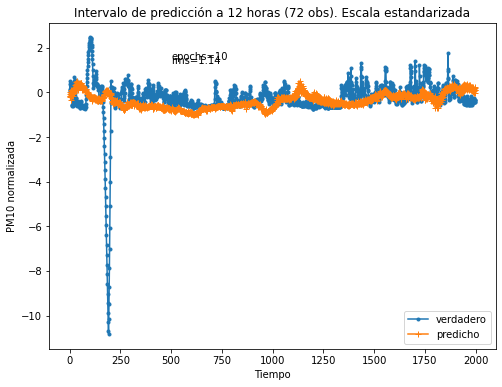

In [225]:
title = "Intervalo de predicción a 12 horas (72 obs). Escala estandarizada"
x_label = 'Tiempo'
y_label = 'PM10 normalizada'
rms = rmsLSTM
plot_series(y_test[:2000], y_pred[:2000],title,x_label, y_label, rms,epochs=10 )

# Modelo Multipaso

In [227]:
future_target = 72
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [228]:

print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 11)

 Target temperature to predict : (72,)


In [229]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [230]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

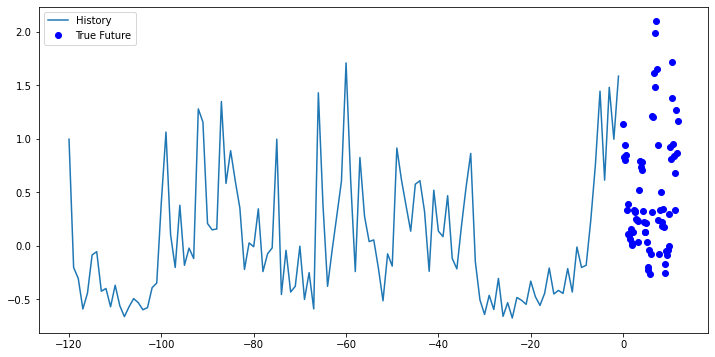

In [231]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

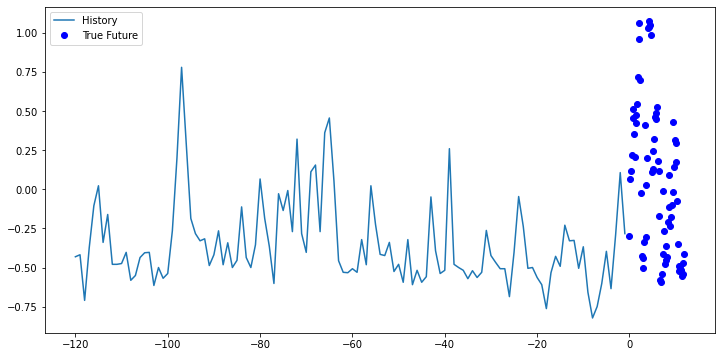

In [232]:

for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

# Modelo LSTM

In [233]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [234]:
multi_step_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120, 32)           5632      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 72)                1224      
Total params: 9,992
Trainable params: 9,992
Non-trainable params: 0
_________________________________________________________________


In [235]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

(256, 72)


# Entrena 


In [236]:

multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 30s 138ms/step - loss: 458.4127 - val_loss: 0.3987
Epoch 2/10
200/200 [==============================] - 28s 140ms/step - loss: 0.4885 - val_loss: 0.4083
Epoch 3/10
200/200 [==============================] - 28s 140ms/step - loss: 0.4446 - val_loss: 0.4086
Epoch 4/10
200/200 [==============================] - 29s 143ms/step - loss: 0.4553 - val_loss: 0.4737
Epoch 5/10
200/200 [==============================] - 28s 141ms/step - loss: 0.4052 - val_loss: 0.4978
Epoch 6/10
200/200 [==============================] - 28s 141ms/step - loss: 0.4290 - val_loss: 0.5260
Epoch 7/10
200/200 [==============================] - 28s 142ms/step - loss: 0.3868 - val_loss: 0.5491
Epoch 8/10
200/200 [==============================] - 29s 143ms/step - loss: 0.3890 - val_loss: 0.6658
Epoch 9/10
200/200 [==============================] - 29s 143ms/step - loss: 0.3802 - val_loss: 0.6728
Epoch 10/10
200/200 [==============================] - 28s 142ms/step -

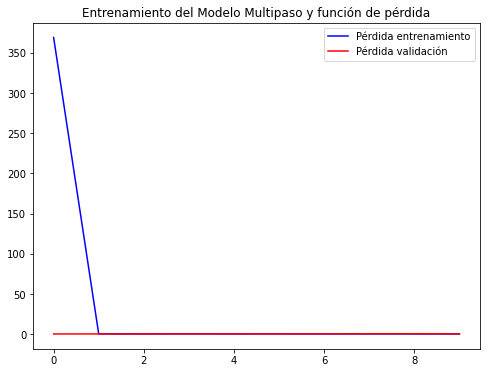

In [237]:
plot_train_history(multi_step_history, 'Entrenamiento del Modelo Multipaso y función de pérdida')


# Predicciones

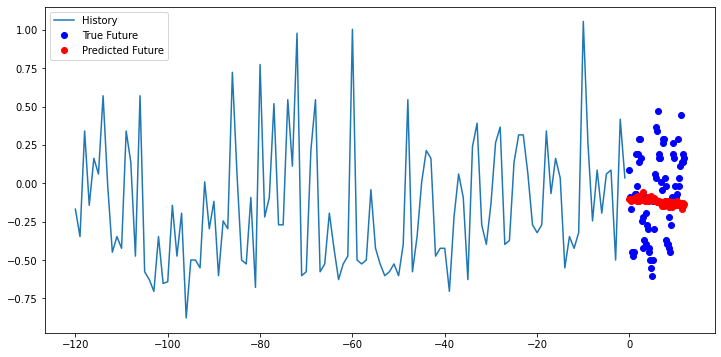

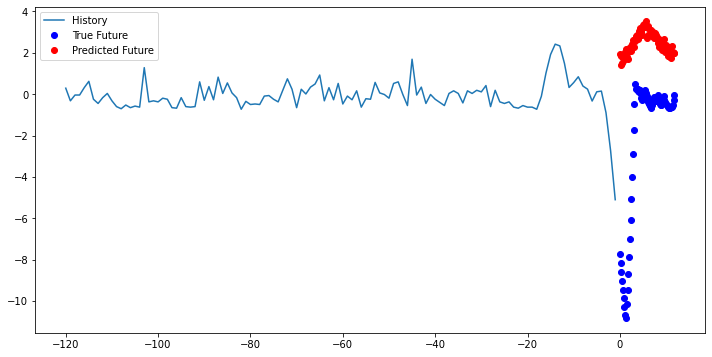

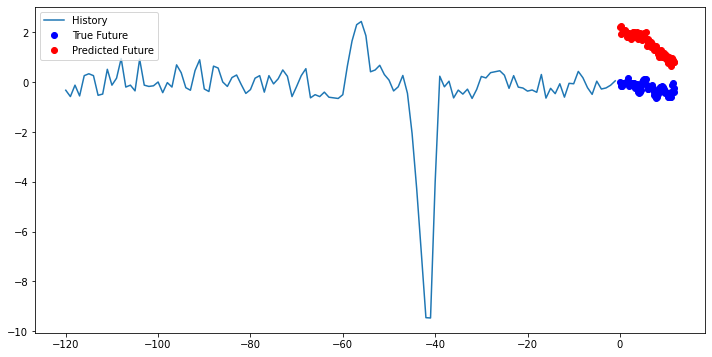

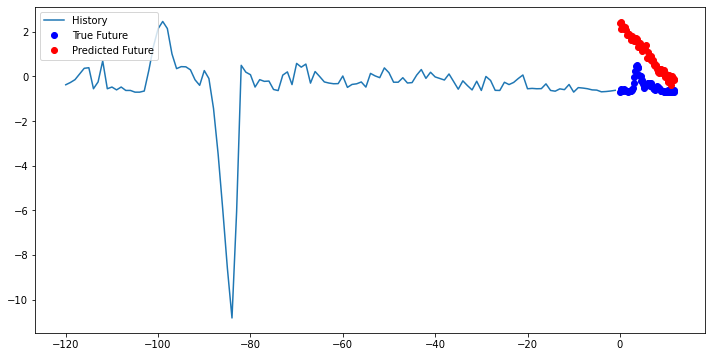

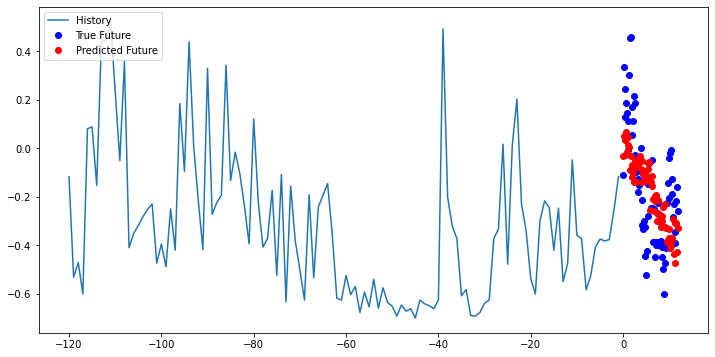

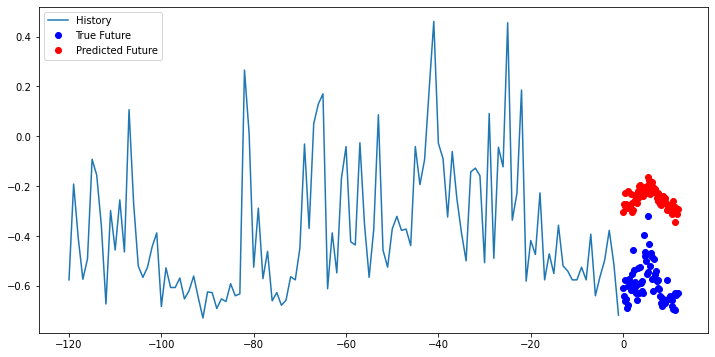

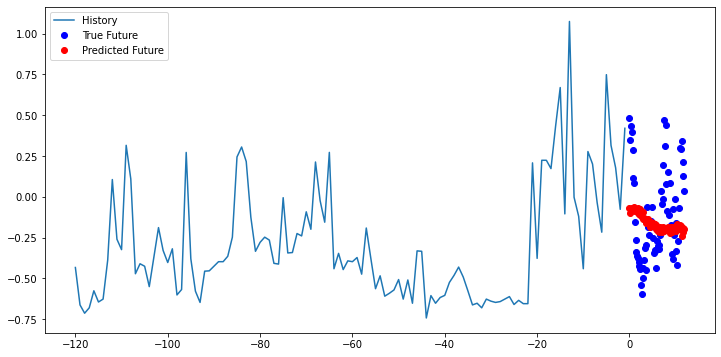

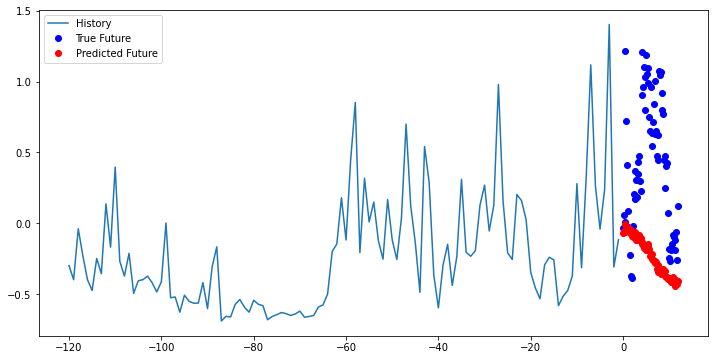

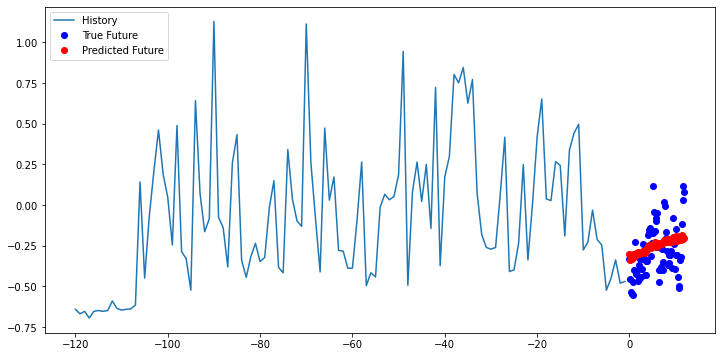

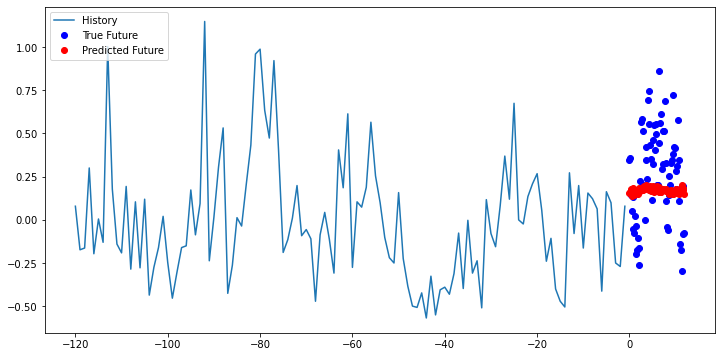

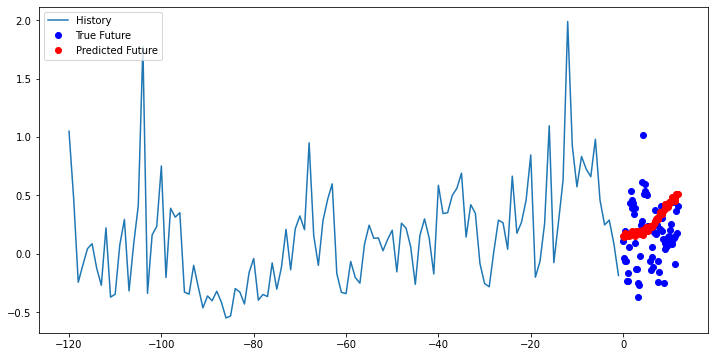

In [239]:
for x, y in val_data_multi.take(11):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])